# Распознавание предметов одежды из набора MNIST

Импортируем необходимые библиотеки

In [1]:
from tensorflow.keras.optimizers import Adam
""" объект последовательной модели нейронной сети """
from tensorflow.keras.models import Sequential
""" полносвязный слой нейронной сети """
from tensorflow.keras.layers import Dense
""" вспомогательный модуль Keras для предварительной обработки данных """
from tensorflow.keras import utils
""" библиотекf для работы с матрицами (многомерными тензорами) и линейной алгеброй """
import numpy as np
""" библиотека для считывания и записи файлов в формате ".csv" и других табличных форматах,
    а также для их быстрой и удобной обработки """
import pandas as pd
""" библиотека для работы с операционной системой """
import os 

"""Зафиксируем генератор случайных чисел. Его не менять!!!"""
from numpy.random import seed
seed(2020)
from tensorflow.random import set_seed
set_seed(2020)
""" библиотека для визуализации данных """
import matplotlib.pyplot as plt
%matplotlib inline 
""" посмотрим, какие файлы храняться в директории """
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nnfashinmnist/sample_submission.csv
/kaggle/input/nnfashinmnist/train.csv
/kaggle/input/nnfashinmnist/test.csv


Загружаем наборы данных для обучения и тестирования

In [2]:
"""функция "read_csv" презназначена для считывания файлов в формате ".csv"
filepath_or_buffer - путь к файлу,
index_col - необязательный параметр, который указывает какую колонку использовать, как индекс.
Если параметр не указан, что pandas создаст столбец с индексами самостоятельно
Подробнее о возможностях функции https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"""
train_df = pd.read_csv(filepath_or_buffer='/kaggle/input/nnfashinmnist/train.csv', index_col='id')
test_df = pd.read_csv(filepath_or_buffer='/kaggle/input/nnfashinmnist/test.csv', index_col='id')
sample_submission = pd.read_csv(filepath_or_buffer='/kaggle/input/nnfashinmnist/sample_submission.csv', index_col='id')

Извлекаем данные из таблиц pandas в числовые массивы (векторы и матрицы) numpy, которе можно подать на вход нейронной сети

In [3]:
"""iloc позволяет считать необходимые строки и столбцы, обращаясь к ним не по именам, а по порядковой нумерации
Подробнее про функцию iloc https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
Запись train_df['label'], извлекает из всей таблицы столбец с названием 'label' 
.values - преобразовывает pandas DataFrame (объект таблицы) в numpy массив"""
x_train, y_train = train_df.iloc[:,:-1].values, train_df['label'].values
x_test = test_df.values

Проверяем совпадает ли количество признаков в тренировочном и тестовом наборах

In [4]:
assert x_train.shape[1] == x_test.shape[1], 'Количество признаков в тренировочном и тестовом наборах должно совпадать'

Создаем соответствие номеров классов с их названиями

In [5]:
classes = {0:'футболка', 1:'брюки', 2:'свитер', 3:'платье', 4:'пальто',
           5:'туфли', 6:'рубашка', 7:'кроссовки', 8:'сумка', 9:'ботинки'}

Смотрим примеры изображений в наборе

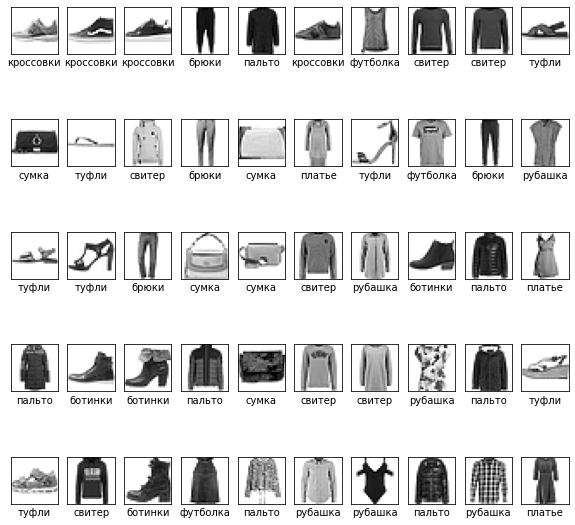

In [6]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

Нормализация данных

In [7]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255.0
# Все преобразования с тренировочным наборам повторяем и для тестового
x_test = x_test / 255.0

Работа с метками правильных ответов

In [8]:
print(y_train[100])

7


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train)

Правильный ответ в формате one hot encoding

In [10]:
print(y_train[100])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [11]:
seed(2020)
set_seed(2020)
# Создаем последовательную модель
model = Sequential()
# Добавляем входной полносвязный слой
model.add(Dense(units=800, input_dim=784, activation="relu"))

# Добавляем скрытый полносвязный слой с ReLU активацией
model.add(Dense(units=400, activation="relu"))

# Добавляем выходной полносвязный слой с softmax активацией
model.add(Dense(units=10, activation="softmax"))

**Компилируем сеть**

In [12]:
seed(2020)
set_seed(2020)
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть[](http://)

In [13]:
seed(2020)
set_seed(2020)
history = model.fit(x_train, y_train, 
                    batch_size=120,
                    epochs=40,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/40
439/439 [==============================] - 5s 12ms/step - loss: 0.4885 - accuracy: 0.8232 - val_loss: 0.4021 - val_accuracy: 0.8560
Epoch 2/40
439/439 [==============================] - 5s 11ms/step - loss: 0.3655 - accuracy: 0.8673 - val_loss: 0.3396 - val_accuracy: 0.8786
Epoch 3/40
439/439 [==============================] - 5s 11ms/step - loss: 0.3248 - accuracy: 0.8794 - val_loss: 0.3265 - val_accuracy: 0.8824
Epoch 4/40
439/439 [==============================] - 5s 11ms/step - loss: 0.3003 - accuracy: 0.8892 - val_loss: 0.3439 - val_accuracy: 0.8771
Epoch 5/40
439/439 [==============================] - 5s 12ms/step - loss: 0.2835 - accuracy: 0.8945 - val_loss: 0.3209 - val_accuracy: 0.8819
Epoch 6/40
439/439 [==============================] - 5s 11ms/step - loss: 0.2668 - accuracy: 0.9007 - val_loss: 0.3070 - val_accuracy: 0.8888
Epoch 7/40
439/439 [==============================] - 5s 11ms/step - loss: 0.2523 - accuracy: 0.9050 - val_loss: 0.2976 - val_accuracy: 0.8929

## Анализ качества модели с помощью проверочных кривых

Изменение точности на обучающих и проверочных данных

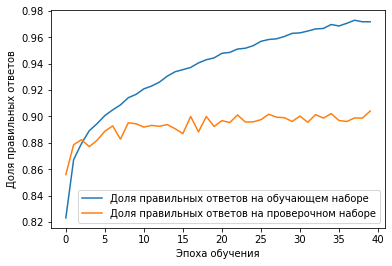

In [14]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

Изменение потерь на обучающих и проверочных данных

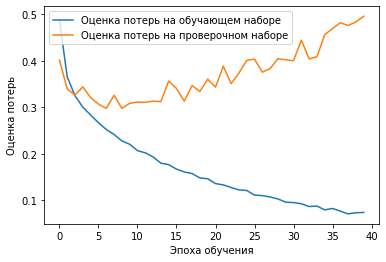

In [15]:
plt.plot(history.history['loss'], 
         label='Оценка потерь на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Оценка потерь на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Оценка потерь')
plt.legend()
plt.show()

## Готовим данные для теста на liderboard

Распознаем тестовый набор данных

In [16]:
"""делаем предсказания по всем тестовым данным"""
predictions = model.predict(x_test)
"""извлекаем номера предсказаний с максимальными вероятностями по всем объектам тестового набора"""
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 2, 7, ..., 6, 0, 5])

Пишем результаты предсказаний в шаблон "sample_submission"

In [17]:
"""используем файл с правильным шаблоном формата записи ответов и пишем в него наши предсказания"""
sample_submission['label'] = predictions

Записываем ответы для проверки на liderboard

In [18]:
"""to_csv - пишет табличные данные в файл '.csv' """
sample_submission.to_csv('sample_submission.csv')

**Если на основе сравнения тренировочных и проверочных данных вы пришли к выводу, что избавились от переобучения,сравните значение "accuracy" на последней эпохе обучения и на тесте, после "submission".**

**Эти 2 оценки должны расходиться меньше чем на 2% (или 0.02)**